MD. TANVIR JAWAD<br>ID: 21101221

In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' + 'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [2]:
from modsim import *

In [3]:
download('https://raw.githubusercontent.com/AllenDowney/' + 'ModSimPy/master/data/World_population_estimates.html')

Downloaded World_population_estimates.html


In [4]:
from pandas import read_html

filename = 'World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
len(tables)

6

In [5]:
table1 = tables[1]
table1.head()

,Population Reference Bureau (1973–2016)[15],United Nations Department of Economic and Social Affairs (2015)[16],Maddison (2008)[17],HYDE (2010)[citation needed],Tanton (1994)[18],Biraben (1980)[19],McEvedy & Jones (1978)[20],Thomlinson (1975)[21],Durand (1974)[22],Clark (1967)[23]
Year,,,,,,,,,,
-10000,NaN,NaN,NaN,2M[24],NaN,NaN,4.0,1–10M,NaN,NaN
-9000,NaN,NaN,NaN,4.,NaN,NaN,NaN,NaN,NaN,NaN
-8000,5.,NaN,NaN,5.,NaN,NaN,NaN,NaN,5–10M,NaN
-7000,NaN,NaN,NaN,8.,NaN,NaN,NaN,NaN,NaN,NaN
-6000,NaN,NaN,NaN,11.,NaN,NaN,NaN,NaN,NaN,NaN


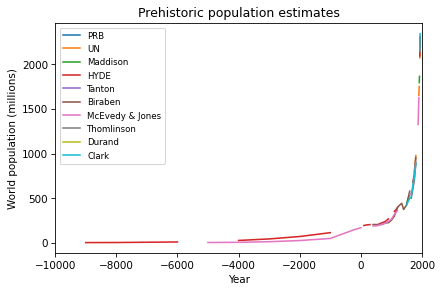

In [16]:
table1.columns = ['PRB', 'UN', 'Maddison', 'HYDE', 'Tanton', 'Biraben', 'McEvedy & Jones', 'Thomlinson', 'Durand', 'Clark']
for col in table1.columns:
    table1[col] = pd.to_numeric(table1[col], errors='coerce')
table1.plot()
decorate(xlim=[-10000, 2000], xlabel='Year', ylabel='World population (millions)', title='Prehistoric population estimates')
plt.legend(fontsize='small');

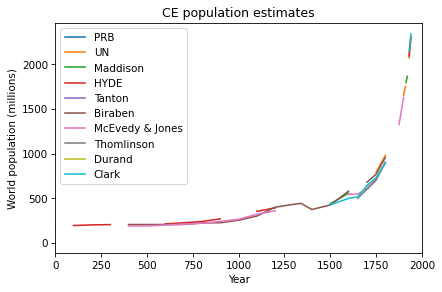

In [9]:
table1.plot()
decorate(xlim=[0, 2000], xlabel='Year', ylabel='World population (millions)', title='CE population estimates')

In [10]:
tables = read_html(filename, header=0, index_col=0, decimal='M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison', 'hyde', 'tanton', 'biraben', 'mj', 'thomlinson', 'durand', 'clark']

In [11]:
un = table2.un / 1e9
census = table2.census / 1e9

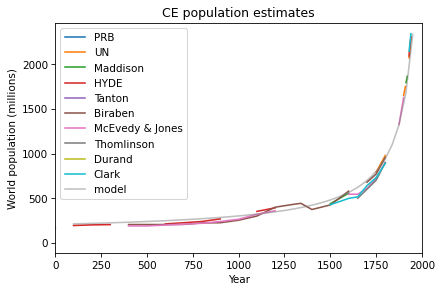

In [12]:
from numpy import linspace
from matplotlib.pyplot import plot

xs = linspace(100, 1950)
ys = 110 + 200000 / (2040 - xs)
table1.plot()
plot(xs, ys, color='gray', alpha=0.5, label='model')

decorate(xlim=[0, 2000], xlabel='Year', ylabel='World population (millions)', title='CE population estimates')

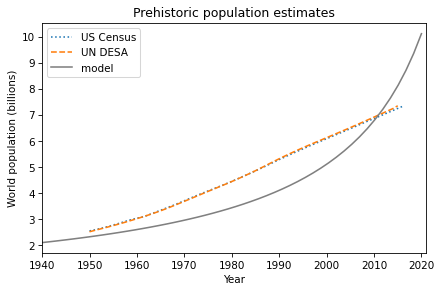

In [13]:
plot(census, ':', label='US Census')
plot(un, '--', label='UN DESA')

xs = linspace(1940, 2020)
ys = 110 + 200000 / (2040 - xs)
plot(xs, ys/1000, color='gray', label='model')

decorate(xlim=[1940, 2021], xlabel='Year', ylabel='World population (billions)', title='Prehistoric population estimates')